Sales Prediction for a large scale Retail chain- 
Goal: In this notebook, we will fit different models on our data and evaluate those models. We will be mainly using Time Series Analysis and Regression modeling to make predictions. Our models will make sales predictions for the following and we can choose the best model based on some evaluation metrics. 

In [1]:
import pandas as pd
import numpy as np
import os
import joblib 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_validate

##### Load the Data

In [2]:
#retail_data= pd.read_csv('/Users/jisasv1/Documents/dataScience/Datasets/Capstone2Data/retail_data_Pre-processed.csv')

In [3]:
retail_data = pd.read_csv('/Users/jisasv1/Documents/dataScience/Datasets/Capstone2Data/trained.csv')

In [4]:
#load pickle file
#scaler = joblib.load('/Users/jisasv1/Documents/dataScience/Datasets/Capstone2Data/scaler.pkl') #not necessary now

In [5]:
#model = joblib.load('/Users/jisasv1/Documents/dataScience/Datasets/Capstone2Data/model.pkl') 

In [6]:
retail_data.head()

,Unnamed: 0,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,AverageMonthlySales,Store,Dept,IsHoliday_x,IsHoliday_y,Type_A,Type_B,Type_C,AvgWeeklySalesperDept,Date
0,0,0.393782,0.239209,-0.963798,-1.720834,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,...,0.024121,1,1,False,False,1,0,0,19213.485088,2010-02-05
1,1,1.524538,0.239209,-0.963798,-1.720834,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,...,0.024121,1,2,False,False,1,0,0,43607.020113,2010-02-05
2,2,-0.098680,0.239209,-0.963798,-1.720834,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,...,0.024121,1,3,False,False,1,0,0,11793.698516,2010-02-05
3,3,1.055551,0.239209,-0.963798,-1.720834,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,...,0.024121,1,4,False,False,1,0,0,25974.630238,2010-02-05
4,4,0.715425,0.239209,-0.963798,-1.720834,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,...,0.024121,1,5,False,False,1,0,0,21365.583515,2010-02-05


In [7]:
retail_data.drop(['Unnamed: 0'], axis=1, inplace=True) 

In [8]:
retail_data.columns

Index(['Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Month', 'AvgWeeklySalesperStore',
       'AverageMonthlySales', 'Store', 'Dept', 'IsHoliday_x', 'IsHoliday_y',
       'Type_A', 'Type_B', 'Type_C', 'AvgWeeklySalesperDept', 'Date'],
      dtype='object')

##### Modeling

Time series data is just any data displaying how a single variable changes over time. It comes as a collection of metrics typically taken at regular intervals. Common examples of time series data include weekly sales data and daily stock prices.Since Weekly_Sales is what we will be predicting here, we can apply Time Series analysis here.  

In [9]:
retail_data.dtypes

Weekly_Sales              float64
Size                      float64
Temperature               float64
Fuel_Price                float64
MarkDown1                 float64
MarkDown2                 float64
MarkDown3                 float64
MarkDown4                 float64
MarkDown5                 float64
CPI                       float64
Unemployment              float64
Month                     float64
AvgWeeklySalesperStore    float64
AverageMonthlySales       float64
Store                       int64
Dept                        int64
IsHoliday_x                  bool
IsHoliday_y                  bool
Type_A                      int64
Type_B                      int64
Type_C                      int64
AvgWeeklySalesperDept     float64
Date                       object
dtype: object

We can see that Date is of object type, To do Time Series analysis we will have to change the Date column to python datetime and we’ll need to have a date time index so that our data frame is indexed on the timestamp. 

In [10]:
retail_data['Date']= pd.to_datetime(retail_data['Date'])
retail_data.set_index('Date', inplace=True)
retail_data.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,AvgWeeklySalesperStore,AverageMonthlySales,Store,Dept,IsHoliday_x,IsHoliday_y,Type_A,Type_B,Type_C,AvgWeeklySalesperDept
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,0.393782,0.239209,-0.963798,-1.720834,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,1.018774,...,0.826302,0.024121,1,1,False,False,1,0,0,19213.485088
2010-02-05,1.524538,0.239209,-0.963798,-1.720834,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,1.018774,...,0.826302,0.024121,1,2,False,False,1,0,0,43607.020113
2010-02-05,-0.098680,0.239209,-0.963798,-1.720834,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,1.018774,...,0.826302,0.024121,1,3,False,False,1,0,0,11793.698516
2010-02-05,1.055551,0.239209,-0.963798,-1.720834,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,1.018774,...,0.826302,0.024121,1,4,False,False,1,0,0,25974.630238
2010-02-05,0.715425,0.239209,-0.963798,-1.720834,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,1.018774,...,0.826302,0.024121,1,5,False,False,1,0,0,21365.583515


Performimg Time series analysis on the entire dataframe is an overkill.So let's make a new dataframe with only the target variable and Date column.

In [11]:
Time_Seriesdata= retail_data[['AvgWeeklySalesperDept']]

In [12]:
#Time_Seriesdata['Date']= pd.to_datetime(retail_data['Date'])
#Time_Seriesdata.set_index('Date', inplace=True)

In [13]:
Time_Seriesdata.head()

,AvgWeeklySalesperDept
Date,
2010-02-05,19213.485088
2010-02-05,43607.020113
2010-02-05,11793.698516
2010-02-05,25974.630238
2010-02-05,21365.583515


In [14]:
y= Time_Seriesdata.AvgWeeklySalesperDept

<AxesSubplot:xlabel='Date'>

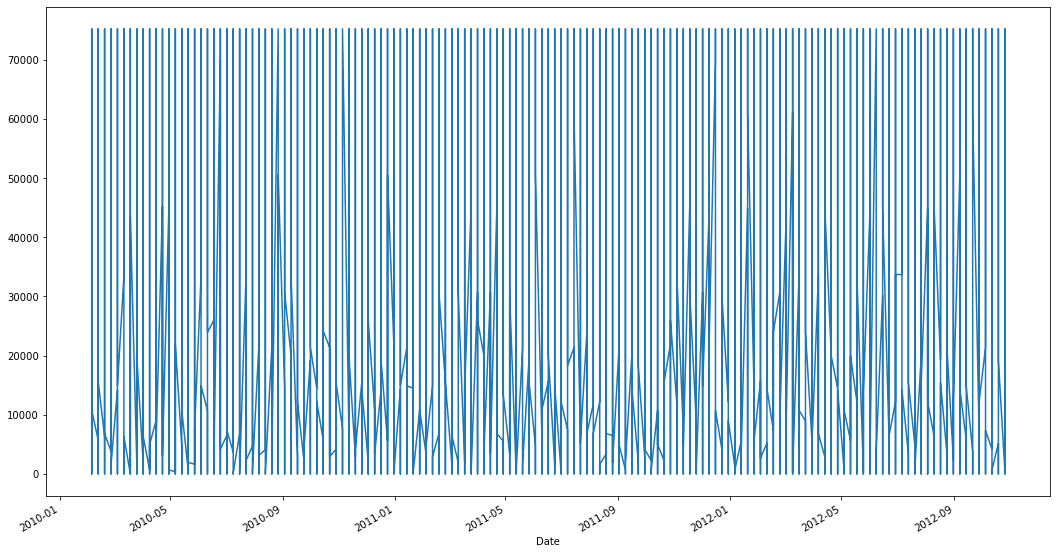

In [15]:
plt.figure(figsize=(18,10))
y.plot()

We can notice from our plot of y, that y has lot of overlapping data. It represents overall Weekly Sales(per department, per store, per week etc). So let's group it by date, and predict the Department-wise sales for the following year. 

In [16]:
Time_Seriesdata= Time_Seriesdata.groupby('Date').sum()

In [17]:
Time_Seriesdata.head()

,AvgWeeklySalesperDept
Date,
2010-02-05,4.680998e+07
2010-02-12,4.695113e+07
2010-02-19,4.712124e+07
2010-02-26,4.681797e+07
2010-03-05,4.671044e+07


In [18]:
#let's define our dependent variable y
y= Time_Seriesdata.AvgWeeklySalesperDept

<AxesSubplot:xlabel='Date'>

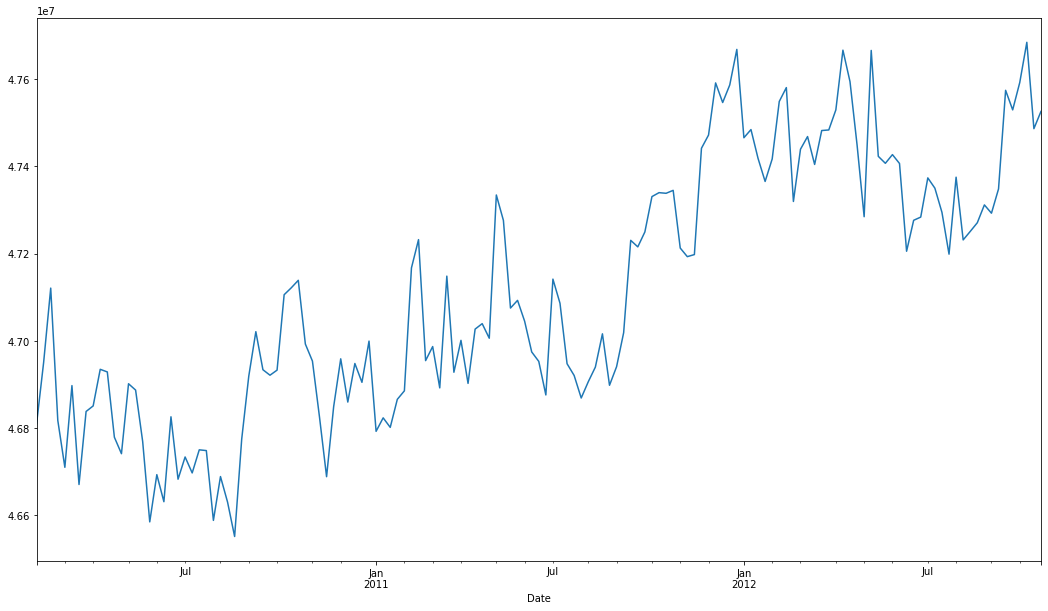

In [19]:
#Let's try visualizing our data using a simple matplotlib.
plt.figure(figsize=(18,10))
y.plot()

### Decomposition

Our graph looks pretty clean now. No overlapping data. Our plot also shows seasonality. An important feature to be analyzed in a Time Series is the seasonality. We have to now decompose the data to see it's Trend, Level and Noise. Level: is the average value in the series. Trend: is the increasing or decreasing value in the series. Seasonality: is the repeating the short-term cycle in the series. Noise: is the random variation in the series.

In [20]:
#resample the data (per month)
y = Time_Seriesdata['AvgWeeklySalesperDept'].resample('M').sum()

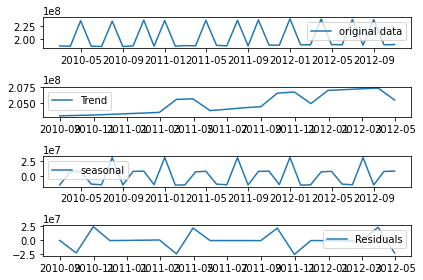

In [21]:
# Import seasonal_decompose 
from statsmodels.tsa.seasonal import seasonal_decompose

# Make a variable called decomposition, and assign it y passed to seasonal_decompose() 
decomposition= seasonal_decompose(y)

# Make three variables for trend, seasonal and residual components respectively. 
# Assign them the relevant features of decomposition 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the original data, the trend, the seasonality, and the residuals 
plt.subplot(411)       #means 4*1 grid 1st subplot
plt.plot(y, label = 'original data')
plt.legend(loc = 'best')
plt.subplot(412)         # this means 4*1 grid 2nd subplot
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'seasonal')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

In [22]:
#import statsmodels.api as sm
#decomposition = sm.tsa.seasonal_decompose(y, model='additive')
#decomposition.plot()

##### Testing for stationarity

There are many ways to test for stationarity, but one of the most common is the KPSS and Dickey Fuller test. Null hypothesis of KPSS test:the time series data in question is stationary Alternate hypothesis : the time series is not stationary. if the p-value is less than the significance level (typically 0.05, but we decide) then we reject the Null and infer that the data is not stationary.

Augmented Dickey Fuller Test- Null Hypothesis: The series is not stationary Alternate Hypothesis: The series is stationary if p-value is less than 0.05 we reject the null hypothesis and accept the alternate hypothesis that data is stationary.

In [23]:
from statsmodels.tsa.stattools import kpss
kpss(y,nlags="auto") 

/Users/jisasv1/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.28398125715985917,
 0.1,
 11,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

according to this test, our data is stationary. But let's perform a adfuller test as well to be sure.

In [24]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(y, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Test Statistic                -9.355249e+00
p-value                        8.092178e-16
#Lags Used                     1.000000e+00
Number of Observations Used    3.100000e+01
Critical Value (1%)           -3.661429e+00
Critical Value (5%)           -2.960525e+00
Critical Value (10%)          -2.619319e+00
dtype: float64


According to Augmented Dickey-Fullet test, the p-value is 0.08, not less than 0.05 which means we accept the null hypothesis that our data is not stationary.

##### Making Data Stationary

<AxesSubplot:xlabel='Date'>

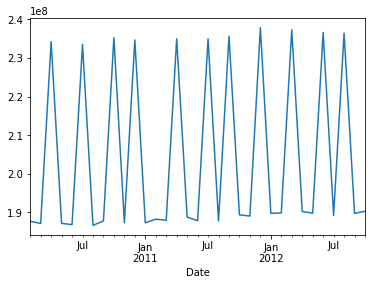

In [25]:
y.plot()

One often used way of getting rid of changing variance is to take the natural log of all the values in our dataset. Let's do this now.

In [26]:
#Declare a variable called y_log
y_log = np.log(y)

<AxesSubplot:xlabel='Date'>

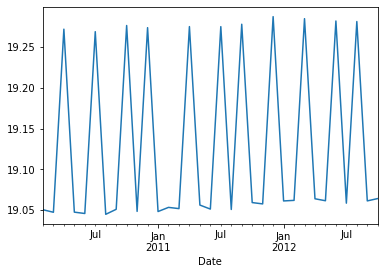

In [27]:
y_log.plot()   # No difference here 

We now have a constant variance, but we also need a constant mean.

We can do this by *differencing* our data. We difference a time series dataset when we create a new time series comprising the difference between the values of our existing dataset.

Python is powerful, and we can use the `diff()` function to do this. You'll notice there's one less value than our existing dataset (since we're taking the difference between the existing values).

In [28]:
y_log_diff= y_log.diff()

In [29]:
y_log_diff

Date
2010-02-28         NaN
2010-03-31   -0.003109
2010-04-30    0.224593
2010-05-31   -0.224450
2010-06-30   -0.001657
2010-07-31    0.223043
2010-08-31   -0.224049
2010-09-30    0.006141
2010-10-31    0.225474
2010-11-30   -0.228026
2010-12-31    0.225385
2011-01-31   -0.225560
2011-02-28    0.005090
2011-03-31   -0.001509
2011-04-30    0.223278
2011-05-31   -0.218910
2011-06-30   -0.004938
2011-07-31    0.223800
2011-08-31   -0.224269
2011-09-30    0.227202
2011-10-31   -0.218753
2011-11-30   -0.001631
2011-12-31    0.229714
2012-01-31   -0.226079
2012-02-29    0.000697
2012-03-31    0.222913
2012-04-30   -0.220948
2012-05-31   -0.002415
2012-06-30    0.220499
2012-07-31   -0.223473
2012-08-31    0.222800
2012-09-30   -0.220015
2012-10-31    0.002863
Freq: M, Name: AvgWeeklySalesperDept, dtype: float64

In [30]:
#Drop all NaN values 
y_log_diff.dropna(inplace=True)

<AxesSubplot:xlabel='Date'>

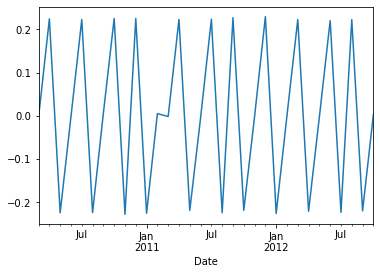

In [31]:
y_log_diff.plot()

Test if stationary

In [32]:
kpss(y_log_diff, nlags="auto")

/Users/jisasv1/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.26404342091245536,
 0.1,
 10,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

Our p-value is now greater than 0.05, so we can accept the null hypothesis that our data is stationary. Note , the second value here is p-value.

In [33]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(y_log_diff, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Test Statistic                 -3.627219
p-value                         0.005261
#Lags Used                      7.000000
Number of Observations Used    24.000000
Critical Value (1%)            -3.737709
Critical Value (5%)            -2.992216
Critical Value (10%)           -2.635747
dtype: float64


p-value is less than 0.05 , so we can accept the alternate hypothesis that our data is stationary now.

In [34]:
#from statsmodels.graphics.tsaplots import plot_acf
#plot_acf(y_log_diff, lags=10)

In [35]:
#from statsmodels.graphics.tsaplots import plot_pacf
#plot_pacf(y_log_diff, lags=10)

#### Modeling

The ARIMA Model

Recall that ARIMA models are based around the idea that it's possible to predict the next value in a time series by using information about the most recent data points. It also assumes there will be some randomness in our data that can't ever be predicted.

In [36]:
# Import mean_squared_error and ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

In [37]:
#model = ARIMA(y_log, order=(2, 1, 2))  
#results_ARIMA = model.fit(disp=-1)  
#plt.plot(y_log_diff)
#plt.plot(results_ARIMA.fittedvalues, color='red')
#plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-y_log_diff)**2))

In [38]:
#Make a function called evaluate_arima_model to find the MSE of a single ARIMA model 
def evaluate_arima_model(data, arima_order):
    # Needs to be an integer because it is later used as an index.
    # Use int()
    split= int(len(data) * 0.8) 
    # Make train and test variables, with 'train, test'
    train, test = data[0:split], data[split:len(data)]
    past=[x for x in train]
    # make predictions
    predictions = list()
    for i in range(len(test)):#timestep-wise comparison between test data and one-step prediction ARIMA model. 
        model = ARIMA(past, order=arima_order)
        model_fit = model.fit(disp=0)
        future = model_fit.forecast()[0]
        predictions.append(future)
        past.append(test[i])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    # Return the error
    return error

##### Make a function to find the MSE of a single ARIMA model

Note: A nonseasonal ARIMA modal is represented as ARIMA(p,d,q), where p is the number of autoregressive terms(AR), d is the number of nonseasonal differences needed for stationarity, and q is the number of lagged forecast errors in the prediction equation(MA).

In [39]:
# Make a function to evaluate different ARIMA models with several different p, d, and q values.
def evaluate_models(dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None                 #p,d,q ?
    # Iterate through p_values      
    for p in p_values:
        # Iterate through d_values
        for d in d_values:
            # Iterate through q_values
            for q in q_values:
                # p, d, q iterator variables in that order
                order = (p,d,q)
                try:
                    # Make a variable called mse for the Mean squared error
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    return print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [40]:
# Now, we choose a couple of values to try for each parameter.
p_values = [x for x in range(0, 3)]
d_values = [x for x in range(0, 3)]
q_values = [x for x in range(0, 3)]

In [41]:
# Finally, we can find the optimum ARIMA model for our data.
# Nb. this can take a while...!
import warnings
warnings.filterwarnings("ignore")
evaluate_models(y_log_diff, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=0.037
ARIMA(0, 0, 1) MSE=0.012
ARIMA(0, 0, 2) MSE=0.005
ARIMA(0, 1, 0) MSE=0.139
ARIMA(0, 1, 1) MSE=0.038
ARIMA(0, 1, 2) MSE=0.011
ARIMA(0, 2, 0) MSE=0.497
ARIMA(0, 2, 1) MSE=0.148
ARIMA(1, 0, 0) MSE=0.018
ARIMA(1, 1, 0) MSE=0.055
ARIMA(1, 2, 0) MSE=0.210
ARIMA(2, 0, 0) MSE=0.009
ARIMA(2, 0, 1) MSE=2507.380
ARIMA(2, 0, 2) MSE=0.005
ARIMA(2, 1, 0) MSE=0.017
ARIMA(2, 2, 0) MSE=0.050
Best ARIMA(0, 0, 2) MSE=0.005


In [42]:
p=0
d=0
q=2
#y_log_diff = y_log.diff().dropna()
model = ARIMA(y_log_diff, order=(p,d,q))
model_fit = model.fit()
forecast = model_fit.forecast(12)

In [43]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                ARMA Model Results                               
=================================================================================
Dep. Variable:     AvgWeeklySalesperDept   No. Observations:                   32
Model:                        ARMA(0, 2)   Log Likelihood                  35.722
Method:                          css-mle   S.D. of innovations              0.068
Date:                   Fri, 21 May 2021   AIC                            -63.444
Time:                           20:52:51   BIC                            -57.582
Sample:                       03-31-2010   HQIC                           -61.501
                            - 10-31-2012                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.0009      0.000      3.839      0.000       0.000       0.001
ma.L1.AvgWeeklySalesperDept    -1.9819      0.119    -16.603      0.000      -2.216      -1.748
ma.L2.AvgWeeklySalesperDept     0.9994      0.119      8.410      0.000       0.767       1.232
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            0.9915           -0.1322j            1.0003           -0.0211
MA.2            0.9915           +0.1322j            1.0003            0.0211
-----------------------------------------------------------------------------
"""

The summary results for the models looks satisfactory. Lower AIC and BIC values are considered better. It means that our model is making better predictions. 

#### Visualize the Results

Visualize the original dataset plotted against our model. 

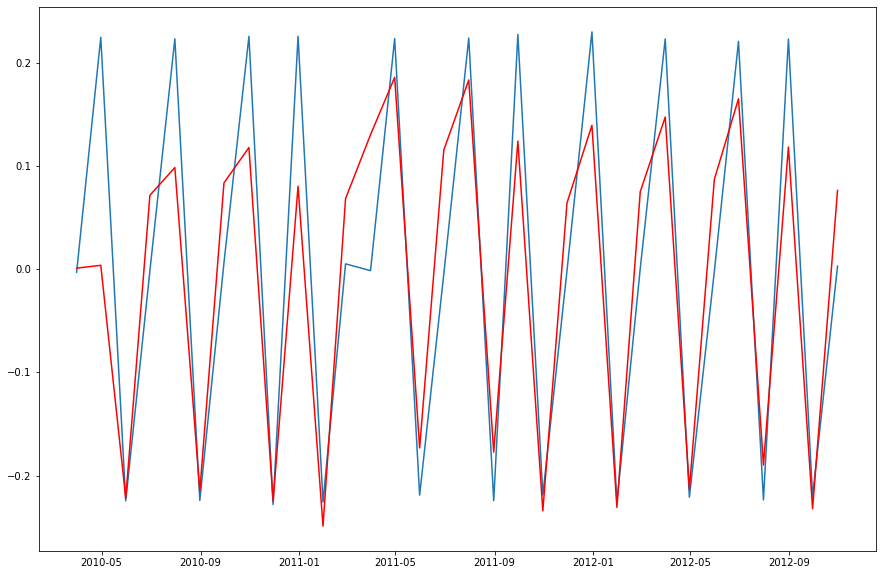

In [44]:
plt.figure(figsize=(15,10)) #change the size of the figure
plt.plot(y_log_diff)#original data  #y_log or y_log_diff()
plt.plot(model_fit.predict(), color = 'red') #predicted model

We've done well: our model fits pretty closely to our existing data. Let's now use it to forecast what's likely to occur in future.

#### 3f. Application: Forecasting

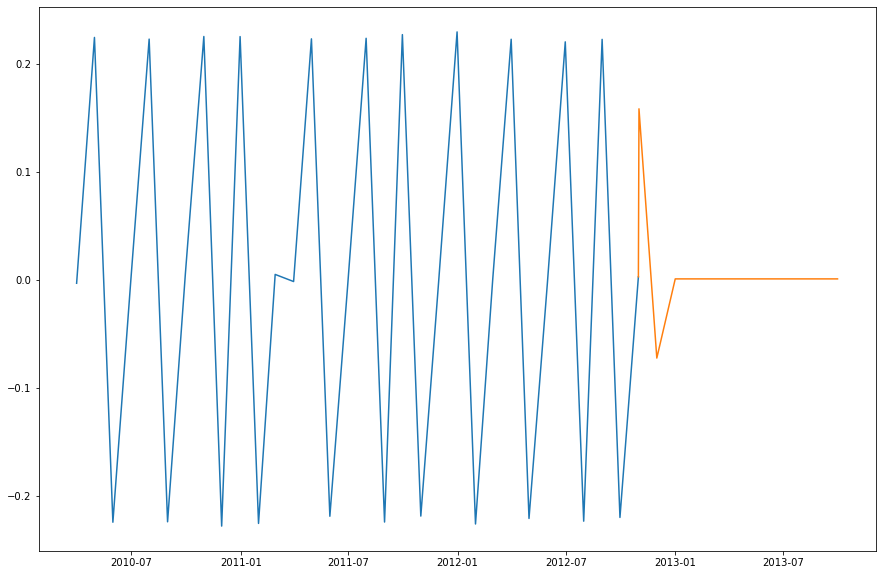

In [45]:
# Declare a variable called forecast_period with the amount of months to forecast, and
# create a range of future dates that is the length of the periods you've chosen to forecast
forecast_period = 12  #Forecast for next 1 year = 12 months (Should be same integer as in model_fit_predict)
date_range = pd.date_range(y_log.index[-1], periods = forecast_period, 
              freq='MS').strftime("%Y-%m-%d").tolist() #The strftime() function is used to convert date and time 
                                                         #objects to their string representation.
#Refer: https://pandas.pydata.org/docs/reference/api/pandas.date_range.html

# Convert that range into a dataframe that includes your predictions
# First, call DataFrame on pd
future_months = pd.DataFrame(date_range, columns = ['Date'])
# Let's now convert the 'Month' column to a datetime object with to_datetime 
future_months['Date'] = pd.to_datetime(future_months['Date'])
future_months.set_index('Date', inplace = True) 
future_months['Prediction'] = forecast[0]

# Plot your future predictions
# Call figure() on plt
plt.figure(figsize=(15,10))
plt.plot(y_log_diff)
plt.plot(y_log_diff['Oct 2012'].append(future_months['Prediction']))
plt.show()

Our model has made quite good predictions. Sales seem to increase during June,November and December of every year,perhaps due to holidays and good weather in June. It kind of remains average during other times of the year.

Remarkably, our ARIMA model made predictions using just one variable.However some sudden circumstances are not handled well by ARIMA.

We could suggest to that doing a regression analysis in addition to the time series one would give a clearer picture. 

### Regression Models


In [46]:
retail_data.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,AvgWeeklySalesperStore,AverageMonthlySales,Store,Dept,IsHoliday_x,IsHoliday_y,Type_A,Type_B,Type_C,AvgWeeklySalesperDept
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,0.393782,0.239209,-0.963798,-1.720834,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,1.018774,...,0.826302,0.024121,1,1,False,False,1,0,0,19213.485088
2010-02-05,1.524538,0.239209,-0.963798,-1.720834,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,1.018774,...,0.826302,0.024121,1,2,False,False,1,0,0,43607.020113
2010-02-05,-0.098680,0.239209,-0.963798,-1.720834,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,1.018774,...,0.826302,0.024121,1,3,False,False,1,0,0,11793.698516
2010-02-05,1.055551,0.239209,-0.963798,-1.720834,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,1.018774,...,0.826302,0.024121,1,4,False,False,1,0,0,25974.630238
2010-02-05,0.715425,0.239209,-0.963798,-1.720834,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,1.018774,...,0.826302,0.024121,1,5,False,False,1,0,0,21365.583515


In [47]:
retail_data.columns

Index(['Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Month', 'AvgWeeklySalesperStore',
       'AverageMonthlySales', 'Store', 'Dept', 'IsHoliday_x', 'IsHoliday_y',
       'Type_A', 'Type_B', 'Type_C', 'AvgWeeklySalesperDept'],
      dtype='object')

In [48]:
#Trained_data.drop(['Unnamed: 0'], axis=1, inplace=True) 

In [49]:
#Trained_data.shape

In [50]:
retail_data.shape

(421570, 22)

In [51]:
y= retail_data[['AvgWeeklySalesperDept']]

In [53]:
X= retail_data.drop(['AvgWeeklySalesperDept'],axis=1)

In [54]:
#Call train_test_split on X, y. Make the test_size = 0.25, and random_state = 123
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, 
                                                 test_size = 0.25,
                                                 random_state = 123)

In [55]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state = 123, n_jobs= -1)
model = rfr.fit(X_train, y_train)

In [56]:
model.score(X_train, y_train)

0.99994546215391

In [57]:
y_pred = model.predict(X_test)
y_pred

array([ 4747.85618777,  4651.7296582 ,  4118.19720847, ...,
       44900.70272727,  4636.32312355, 10187.1204975 ])

In [58]:
from sklearn.metrics import mean_squared_error
#print("R^2 is: \n", model.score(X_test, y_test)) # used only for linear regression
mse = mean_squared_error(y_test,y_pred)
print('RMSE is: \n', np.sqrt(mse)) #RMSE WORKS mostly on all regression models

RMSE is: 
 365.1904556493763


RMSE is good enough, considering the scale of our target variable.
#Reference: https://datascience.stackexchange.com/questions/29293/high-root-mean-square-error-in-regression-model

Text(0, 0.5, 'predicted Sales per-Dept')

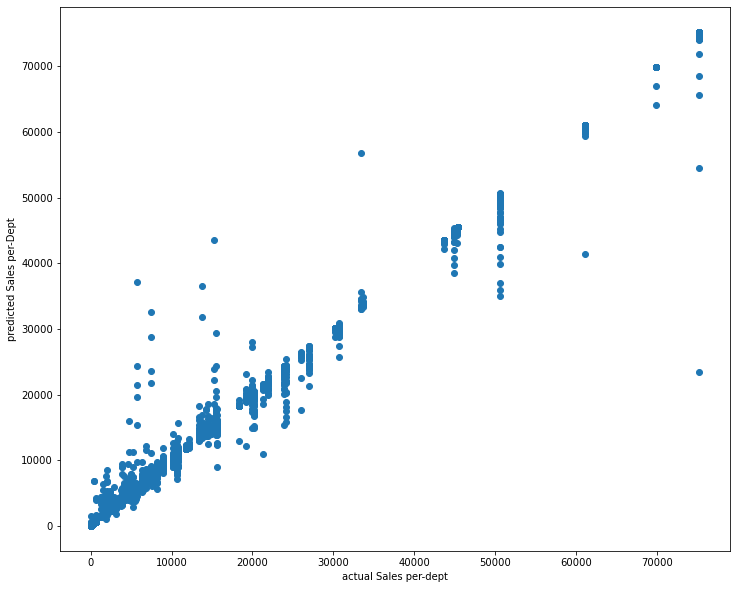

In [59]:
#Checking if there is any correlation between actual sales and predicted sales
plt.figure(figsize=(12,10))
plt.scatter(y_test,y_pred)
plt.xlabel('actual Sales per-dept')
plt.ylabel('predicted Sales per-Dept')

Using the Random Forest Regression model,We can see a good correlation between the actual and predicted values.

I am going to try a linear Regression model and see how it fits. 

In [60]:
from sklearn.linear_model import LinearRegression
rModel = LinearRegression(normalize=True)
model = rModel.fit(X_train, y_train)

In [61]:
print(rModel.score(X_train, y_train))

0.6328651530991511


In [62]:
y_pred = model.predict(X_test)
y_pred

array([[ 3450.],
       [13522.],
       [11604.],
       ...,
       [26806.],
       [ 5618.],
       [14074.]])

In [63]:
from sklearn.metrics import mean_squared_error
print("R^2 is: \n", model.score(X_test, y_test)) # R2 used to evaluate for linear regression models.
mse = mean_squared_error(y_test,y_pred)
print('RMSE is: \n', np.sqrt(mse)) #RMSE WORKS mostly on all regression models

R^2 is: 
 0.6207930118344902
RMSE is: 
 10248.749531292186


The R2 of 0.62 means that the model can predict around 60%. It indicates that 40% of the variability in the outcome data cannot be explained by the model. But our RMSE is higher than that of Random regression model.
Reference:

Text(0, 0.5, 'predicted sales per dept')

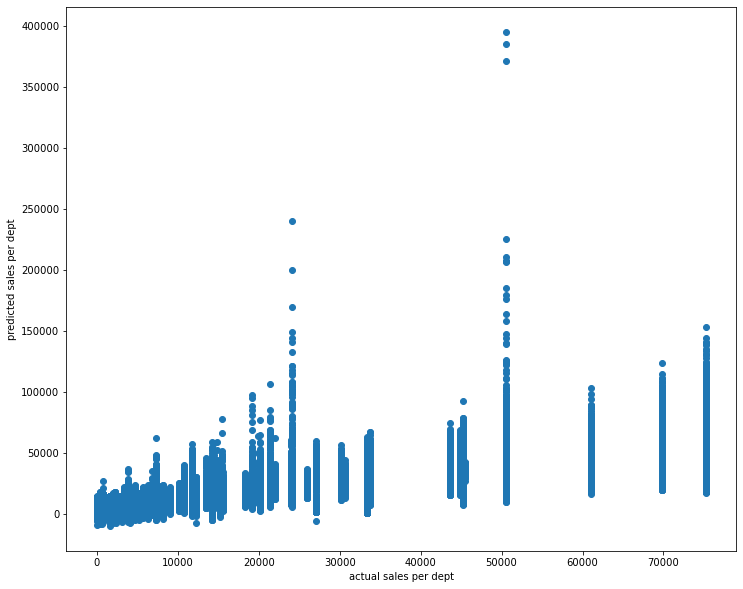

In [64]:
#Let's plot a scatter plot to check the correlation between actua and predicted values.
plt.figure(figsize=(12,10))
plt.scatter(y_test,y_pred)
plt.xlabel('actual sales per dept')
plt.ylabel('predicted sales per dept')

Judging by the plot, it looks like the linear regression model doesn't fit well for our data. There is no correlation between acual and predicted values.

#### Conclusion 

Let's evaluate the different models we have used here - The ARIMA model has given quite a good prediction - Department-wide Sales seem to increase during June,November and December of every year,because of the season- June being summer and November and December being holiday season,and it kind of remains average during other times of the year.

The Regression Models- The Linear Regression model has produced average results. 
However, Random Forest Regression has made quite good predictions. The average Weekly-Sales per department seem to go between 0 to 70,000$. 

Based on our exploratory analysis, Dept92 has the highest average Weekly-sales of 75,000$. Dept95 has about 70,000$ weekly-sales on average. These two departments have the highest average sales. Dept43 seems to have very low sales of around 16$ average per week. Dept 47 is not doing well either at -4900$ average sales per week.

Our Random Regression model seems to have predicted the highs and lows quite accurately.  